<a href="https://colab.research.google.com/github/BongGuenJun/Python/blob/main-branch/Fashion_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

import os


fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:


print(x_train.shape)

(60000, 28, 28)


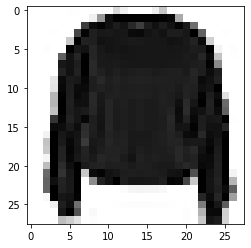

In [ ]:

plt.imshow(x_train[7], cmap='Greys')
plt.show()

In [ ]:
import sys

for x in x_train[7]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write('\n')
     

0  0  0  0  0  1  1  0  0  0  0  63 28 0  0  0  33 85 0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  2  0  0  28 1262412552552552552552552522481110  0  0  2  0  0  0  0  
0  0  0  0  2  0  0  2062442512412302382212052302402302392512331650  0  2  0  0  0  
0  0  0  1  0  0  1992512282342332362352452472372342392302302352551760  0  1  0  0  
0  0  0  0  0  81 25422622823923723623423223323523523623923723322524673 0  0  0  0  
0  0  3  0  0  25523523922323423823623723623523523523523623523423023125524 0  4  0  
0  0  0  0  17723922325422323223423423623623523523523523523423123322224688 0  1  0  
0  0  0  0  2342392292552202322332322342352352352352352342332322302282541400  0  0  
0  0  0  0  2252402262552212272322282312302282292312302282282322232292442310  0  0  
0  0  0  47 2452312342492292212292252292272262272282272282292282242462402270  0  0  
0  0  0  51 2482302452462302262302272302292282292302282282312252272422372550  0  0  
0  0  0  10125322924724122123322822722922822722823022723023422522

In [ ]:

X_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

     

In [ ]:
y_train[257]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
type(y_train)

numpy.ndarray

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


#MODEL_DIR = './data/model/'
#if not os.path.exists(MODEL_DIR):
#    os.mkdir(MODEL_DIR)

modelpath="./data/model/MNIST_CNN.hdf5"


checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)


history = model.fit(x_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, y_test)[1]))




Epoch 1: val_loss improved from inf to 0.42660, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.42660 to 0.37099, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.37099 to 0.34494, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.34494 to 0.32399, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.32399 to 0.31180, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 6: val_loss improved from 0.31180 to 0.30455, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 7: val_loss improved from 0.30455 to 0.28999, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 8: val_loss improved from 0.28999 to 0.28322, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 9: val_loss improved from 0.28322 to 0.27650, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 10: val_loss improved from 0.27650 to 0.27012, saving model to ./data/model/MNIST_CNN.hdf5

Epoch 11: val_loss did not impro

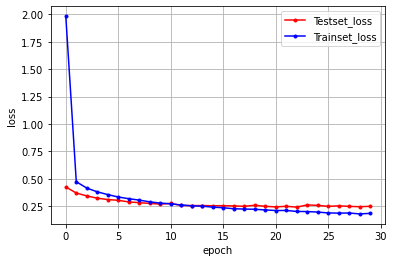

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')


plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
     